In [1]:
from hold import connection_string
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import squarify

engine = create_engine(f'{connection_string}',encoding='iso-8859-1', connect_args={'connect_timeout': 10})

In [2]:
global_terror_df = pd.read_sql('select * from global_terrorism', con=engine)

In [12]:
global_terror_df.count()

iyear               92700
imonth              92700
iday                92700
date                92477
country_txt         92700
region_txt          92700
provstate           92646
city                92272
latitude            92700
longitude           92700
multiple            92700
success             92700
suicide             92700
attacktype1_txt     92700
attacktype2_txt      4289
attacktype3_txt       242
targtype1_txt       92700
targsubtype1_txt    87075
corp1               82599
natlty1_txt         91787
gname               92700
claimmode_txt       14212
weaptype1_txt       92700
weapsubtype1_txt    87066
weaptype2_txt        6809
weapsubtype2_txt     6247
kidhijcountry         159
ransom               6417
nkill               92700
nwound              92700
index1              92700
dtype: int64

In [3]:
len(global_terror_df['gname'].unique())

1311

<function matplotlib.pyplot.show(*args, **kw)>

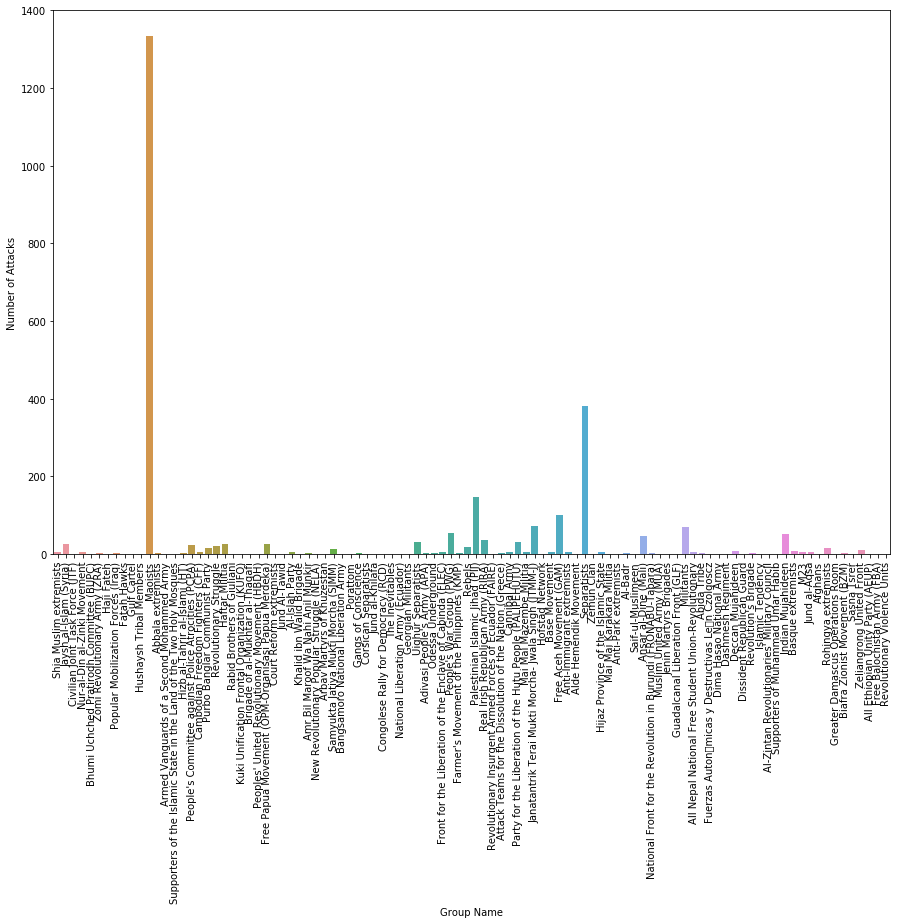

In [4]:
plt.subplots(figsize= (15, 10))
terror_groups = global_terror_df['gname'].value_counts(sort=True)
group_sample = terror_groups.sample(n=100)
p = sns.barplot(group_sample.index, group_sample)
p.set(xlabel='Group Name', ylabel='Number of Attacks')
p.set_xticklabels(group_sample.index, rotation= 90)
plt.show

/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


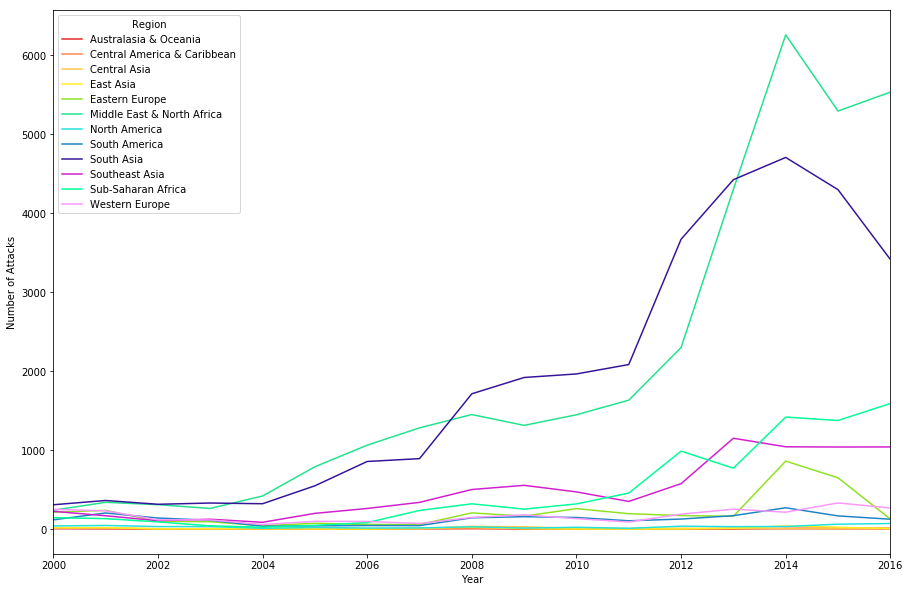

In [9]:
def attacks_region(global_terror_df):
    plt.subplots(figsize=(15,10))
    d = global_terror_df.groupby(['region_txt','iyear'])['iyear'].count()
    d = pd.DataFrame(d)
    d.reset_index(level=0,inplace=True)
    d.columns = ['Region','Number of Attacks']
    d.reset_index(level=0,inplace=True)
    d['dummy']=0
    color_set = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce","#00ff99","#fa97fc"]
    t = sns.tsplot(time='iyear',value='Number of Attacks',condition='Region',data=d,unit='dummy',color = sns.color_palette(color_set))
    t.set_xlabel("Year")
    
attacks_region(global_terror_df)
plt.savefig('GTA/front_end/static/front_end/assets/atk_region.png')
plt.show()

In [35]:
def attacks_per_month(global_terror_df,gname,year):
    data2 = global_terror_df[(global_terror_df['gname']==gname) & (global_terror_df['iyear']==year)]
    attacks_month = data2.groupby(['imonth'])['nkill'].sum()
    quarters = pd.Series([sum(attacks_month.iloc[0:3]),sum(attacks_month.iloc[3:6]),sum(attacks_month.iloc[6:9]),sum(attacks_month.iloc[9:])],index=[1,2,3,4])
    plot2 = sns.barplot(quarters.index ,quarters)
    plot2.set_xlabel('Quarter')
    plot2.set_ylabel('Number of Attacks')
    plot2.set_title(gname + " in "+str(year))
    plt.show()
for i in range (2012, 2017):
    attacks_per_month(global_terror_df, "Taliban", i)

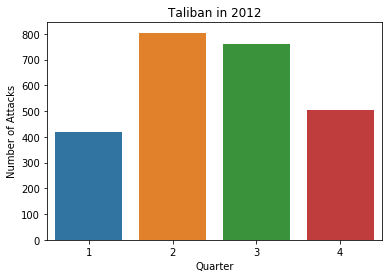

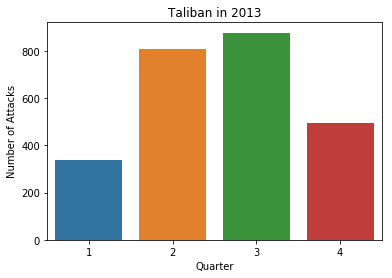

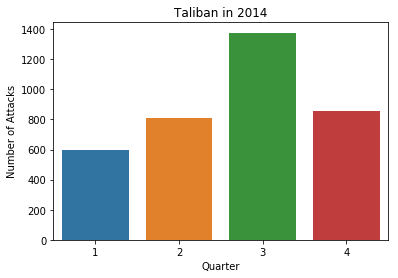

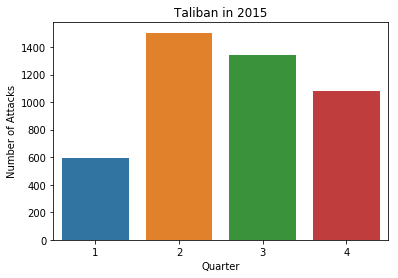

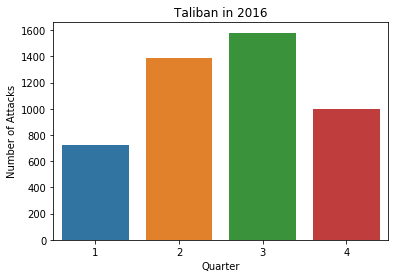

<Figure size 432x288 with 0 Axes>

In [36]:
for i in range (2012, 2017):
    attacks_per_month(global_terror_df, "Taliban", i)


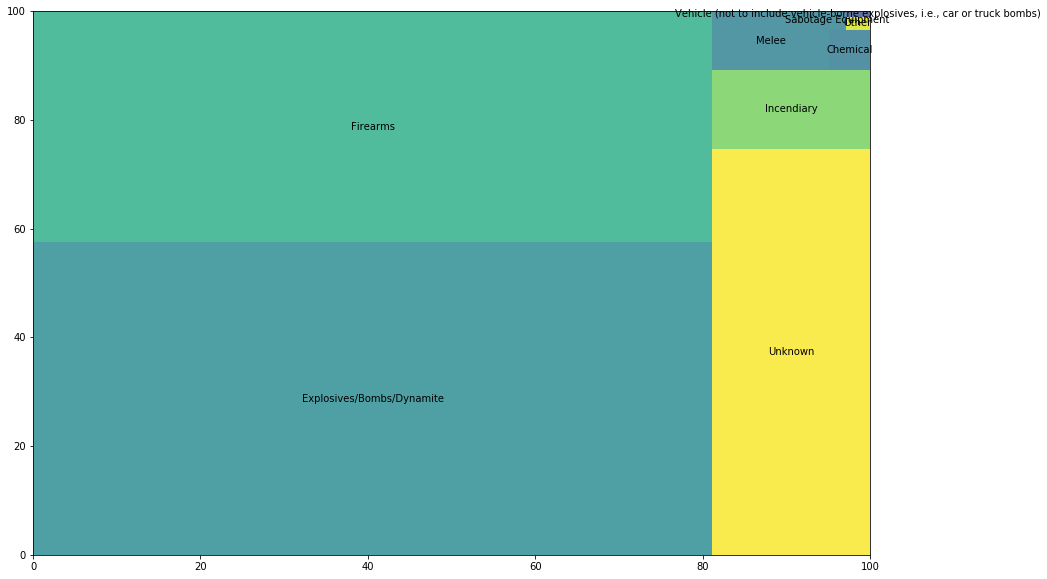

In [8]:
gname = "Taliban"
def treeplot(global_terror_df, gname):
    plt.subplots(figsize= (15,10))
    weap_tree = pd.DataFrame(global_terror_df[global_terror_df['gname']==gname]['weaptype1_txt'].value_counts())
    weap_tree.reset_index(level= 0, inplace= True)
    t = squarify.plot(sizes=weap_tree["weaptype1_txt"], label=weap_tree["index"], alpha= 0.8)
    plt.savefig('GTA/front_end/static/front_end/assets/tali_weap.png')
    plt.show()

treeplot(global_terror_df,"Taliban")
